<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [3]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [7]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [17]:
#df[df['Churn'] == 1]['Total day minutes'].mean()
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

**3. Какова доля граждан Германии (признак *native-country*)?**

In [19]:
data['native-country'].value_counts(normalize = True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

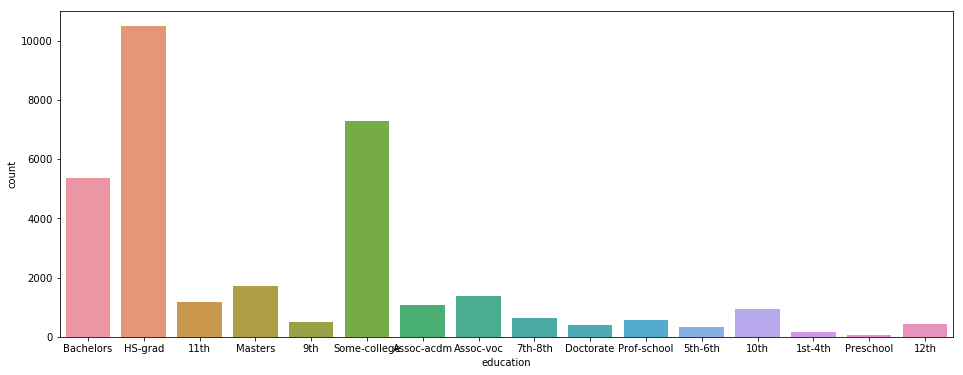

In [64]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 6)
sns.countplot(x='education', data=data);


**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [25]:
d = {'<=50K' : 0, '>50K' : 1}
data['salary'] = data['salary'].map(d)


In [30]:
data[data['salary'] == 1]['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [28]:
data[data['salary'] == 1]['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [34]:
import numpy as np
data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [40]:
data['married'] = data['marital-status'].str.startswith('Married').astype('int64')

In [42]:
pd.crosstab(data.married,data.salary)

salary,0,1
married,,
0,16039,1105
1,8681,6736


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [45]:
#Max number of hours per weeek
data['hours-per-week'].max()

99

In [49]:
# How many people work these hours
len(data[data['hours-per-week'] == data['hours-per-week'].max()])

85

In [50]:
data[data['hours-per-week'] == data['hours-per-week'].max()]['salary'].mean()

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [56]:
pt = data.pivot_table(['hours-per-week'],['native-country','salary'], aggfunc = 'mean')

In [62]:
pt[30:]

hours-per-week
native-country             salary                
Holand-Netherlands         0            40.000000
Honduras                   0            34.333333
                           1            60.000000
Hong                       0            39.142857
                           1            45.000000
Hungary                    0            31.300000
                           1            50.000000
India                      0            38.233333
                           1            46.475000
Iran                       0            41.440000
                           1            47.500000
Ireland                    0            40.947368
                           1            48.000000
Italy                      0            39.625000
                           1            45.400000
Jamaica                    0            38.239437
                           1            41.100000
Japan                      0            41.000000
                           1            47.958333
Laos                       0            40.375000
                           1            40.000000
Mexico                     0            40.003279
                           1            46.575758
Nicaragua                  0            36.093750
                           1            37.500000
Outlying-US(Guam-USVI-etc) 0            41.857143
Peru                       0            35.068966
                           1            40.000000
Philippines                0            38.065693
                           1            43.032787
Poland                     0            38.166667
                           1            39.000000
Portugal                   0            41.939394
                           1            41.500000
Puerto-Rico                0            38.470588
                           1            39.416667
Scotland                   0            39.444444
                           1            46.666667
South                      0            40.156250
                           1            51.437500
Taiwan                     0            33.774194
                           1            46.800000
Thailand                   0            42.866667
                           1            58.333333
Trinadad&Tobago            0            37.058824
                           1            40.000000
United-States              0            38.799127
                           1            45.505369
Vietnam                    0            37.193548
                           1            39.200000
Yugoslavia                 0            41.600000
                           1            49.500000

In [65]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
0,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
1,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
